In [39]:
import pandas as pd

# Load your ratings.csv
ratings_path = "ratings.csv"

ratings_df = pd.read_csv(ratings_path, dtype={"sample_id": str})

In [40]:
ratings_df

,user_id,sample_id,pleasingness,authenticity,novelty
0,jonathan lehmkuhl,model593M_0008,3,2,2
1,jonathan lehmkuhl,model162M_0017,3,3,3
2,jonathan lehmkuhl,model62M_0013,1,1,1
3,jonathan lehmkuhl,model62M_0015,2,2,3
4,jonathan lehmkuhl,model62M_0014,1,1,1
...,...,...,...,...,...
195,kaan,model593M_0006,4,4,4
196,kaan,model409M_0002,5,5,4
197,kaan,model162M_0016,2,2,3
198,kaan,model62M_0017,3,2,3


In [41]:
samples_df = pd.read_csv("samples.csv", dtype={"sample_id": str})

In [42]:
samples_df["model_size"] = samples_df["model_name"].str.extract(r"(\d+)").astype(int)

samples_df

,sample_id,model_name,file_path,model_size
0,model162M_0000,model162M,samples/model162M/0_generated.mp3,162
1,model162M_0001,model162M,samples/model162M/1_generated.mp3,162
2,model162M_0002,model162M,samples/model162M/2_generated.mp3,162
3,model162M_0003,model162M,samples/model162M/3_generated.mp3,162
4,model162M_0004,model162M,samples/model162M/4_generated.mp3,162
...,...,...,...,...
95,model62M_0015,model62M,samples/model62M/15_generated.mp3,62
96,model62M_0016,model62M,samples/model62M/16_generated.mp3,62
97,model62M_0017,model62M,samples/model62M/17_generated.mp3,62
98,model62M_0018,model62M,samples/model62M/18_generated.mp3,62


In [43]:
merged_df = ratings_df.merge(
    samples_df[["sample_id", "model_name", "model_size"]],
    on="sample_id",
    how="left"
)

merged_df["model_name"] = merged_df["model_name"].str.strip()

In [44]:
merged_df

,user_id,sample_id,pleasingness,authenticity,novelty,model_name,model_size
0,jonathan lehmkuhl,model593M_0008,3,2,2,model593M,593
1,jonathan lehmkuhl,model162M_0017,3,3,3,model162M,162
2,jonathan lehmkuhl,model62M_0013,1,1,1,model62M,62
3,jonathan lehmkuhl,model62M_0015,2,2,3,model62M,62
4,jonathan lehmkuhl,model62M_0014,1,1,1,model62M,62
...,...,...,...,...,...,...,...
195,kaan,model593M_0006,4,4,4,model593M,593
196,kaan,model409M_0002,5,5,4,model409M,409
197,kaan,model162M_0016,2,2,3,model162M,162
198,kaan,model62M_0017,3,2,3,model62M,62


In [45]:
rating_cols = ["pleasingness", "authenticity", "novelty"]

# Compute mean and std
agg_df = merged_df.groupby(["model_size"])[rating_cols].agg(["mean"])

# Flatten the multi-index columns
agg_df.columns = ["_".join(col).strip() for col in agg_df.columns.values]

# Reset index for easy viewing
agg_df = agg_df.reset_index()

agg_df = agg_df.sort_values(by="model_size")
agg_df

,model_size,pleasingness_mean,authenticity_mean,novelty_mean
0,62,3.050,2.875,3.000
1,162,3.225,2.925,3.325
2,267,3.400,3.125,3.475
3,409,3.100,2.800,2.925
4,593,3.175,2.775,3.150


<Figure size 800x500 with 0 Axes>

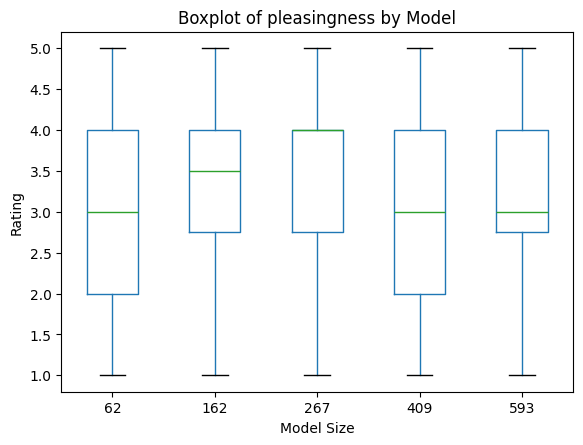

<Figure size 800x500 with 0 Axes>

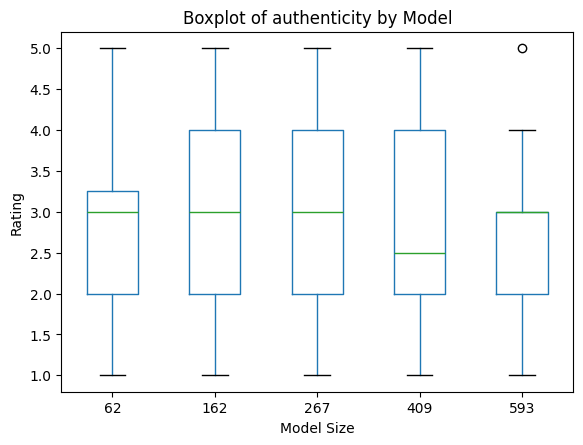

<Figure size 800x500 with 0 Axes>

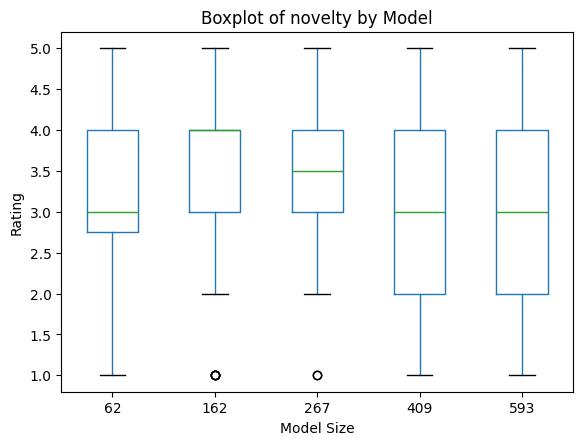

In [46]:
import matplotlib.pyplot as plt

# Loop through each rating dimension
for col in rating_cols:
    plt.figure(figsize=(8,5))
    merged_df.boxplot(column=col, by="model_size", grid=False)
    plt.title(f"Boxplot of {col} by Model")
    plt.suptitle("")   # Remove default tlib title
    plt.xlabel("Model Size")
    plt.ylabel("Rating")
    plt.show()